<IPython.core.display.Javascript object>


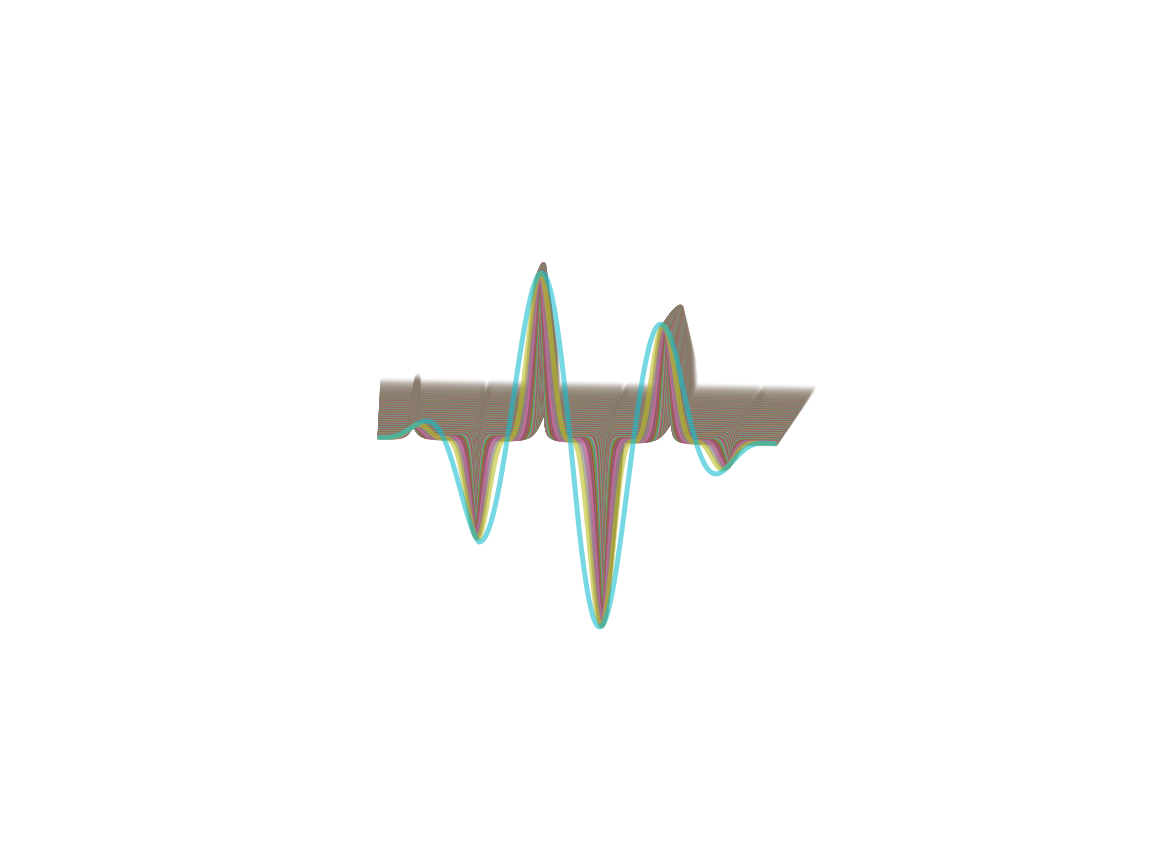

In [1]:
# updated 5_9_20

"""
setup
"""

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.use('Agg')
%matplotlib notebook

# add musiccode scripts folder to path
import sys

# import library
from music_code import music_code

# initialize
m = music_code.MusicCode(120)


"""
set up plot
"""

# figure    
fig = plt.figure(dpi=200)

# 3d axes
ax = fig.add_axes([0.1,0.1,0.8,0.8],projection='3d')
fig.patch.set_visible(False)

# Hide grid lines and axes ticks
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')

"""
set wave values
"""

# Parameters
total_waves = 250
vol = 1
alpha_value = np.linspace(0,.6,total_waves+1)
width=1

# create & plot waves
volume_list = list(np.linspace(1,10,total_waves))
position_list= np.flip(np.arange(1,total_waves*2,2))       
fade_lengths = np.linspace(1/256,1/64,len(volume_list))

"""
loop through wave values
"""

i=1
epoch=0
for vols in volume_list: 
    current_position = position_list[epoch]
    waveform = m.create_wave([50],'sine', duration=1/32, wt_pos=position_list[epoch]).fade(fade_in=fade_lengths[epoch], fade_out=fade_lengths[epoch])*vols
    total_samples = len(waveform)

    # Data for a three-dimensional plot
    zline = waveform
    xline = np.array(range(0,total_samples))+i
    yline = np.zeros(total_samples)+i
    
    # plot 3d
    ax.plot3D(xline, yline, zline,linewidth=2,alpha=alpha_value[epoch])
    
    # update values for next iteration
    width-=.06
    i+=1
    epoch+=1

# display plot
fig.show()